In [1]:
import pandas as pd

In [2]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [3]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [4]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [5]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
data = pd.merge(pd.merge(ratings, users), movies)

In [9]:
data.head(1)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama


In [10]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')


In [11]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [12]:
ratings_by_title = data.groupby('title').size()


In [13]:
ratings_by_title[:5]


title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [14]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]


In [15]:
active_titles[:5]


Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)'],
      dtype='object', name='title')

In [24]:
mean_ratings = mean_ratings.loc[active_titles]


In [25]:
mean_ratings[:5]


gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


In [26]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)


In [27]:
top_female_ratings[:10]


gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [28]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)


In [29]:
top_male_ratings[:10]


gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


In [30]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']


In [31]:
sorted_by_diff = mean_ratings.sort_values(by='diff')


In [32]:
sorted_by_diff[:10]


gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [33]:
sorted_by_diff[::-1][:10]


gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


Q1: An aggregate of the movie ratings for each particular genre.

In [36]:
aggregate_ratings_genre = data.pivot_table('rating',index='genres',aggfunc='mean')

In [37]:
aggregate_ratings_genre[:5]

,rating
genres,
Action,3.354886
Action|Adventure,3.676814
Action|Adventure|Animation,4.147826
Action|Adventure|Animation|Children's|Fantasy,2.703704
Action|Adventure|Animation|Horror|Sci-Fi,3.546926


Q2: The top 5 highest ranked genre by women.

In [38]:

avg_ratings_genre_by_gender = data.pivot_table('rating',index='genres',columns='gender',aggfunc='mean')

In [105]:
top_5_female_genres = avg_ratings_genre_by_gender.sort_values(by='F',ascending=False)[:5]

In [106]:
top_5_female_genres

gender,F,M
genres,,
Animation|Comedy|Thriller,4.550802,4.445110
Animation,4.533333,4.353107
Film-Noir|Romance|Thriller,4.448718,4.211073
Sci-Fi|War,4.376623,4.464789
Adventure|Children's|Drama|Musical,4.355030,4.203138


Q3: Top 5 highest ranked genre by men

In [107]:
top_5_male_genres=avg_ratings_genre_by_gender.sort_values(by='M',ascending=False)[:5]

In [108]:
top_5_male_genres

gender,F,M
genres,,
Sci-Fi|War,4.376623,4.464789
Animation|Comedy|Thriller,4.550802,4.445110
Film-Noir|Mystery,4.319444,4.381536
Adventure|War,4.187970,4.376633
Animation,4.533333,4.353107


Q4: A breakdown of a movie’s ratings by age, use any movie of your choice.

In [78]:
ratings_by_age = data.pivot_table('rating', index='title', columns='age', fill_value=0)
ratings_by_age.query('title ==  ["\'burbs, The (1989)"]')

age,1,18,25,35,45,50,56
title,,,,,,,
"'burbs, The (1989)",4.5,3.244444,2.652174,2.818182,2.545455,3.208333,2.666667


Q5:  A function that given a user id and movie id , returns a list of user ids for
other users that rated the movie identified by the provided movie id with the same score.

In [48]:
def same_rating_by_user(userId, movieId):
    rating = ratings[(ratings['user_id'] == userId) & (ratings['movie_id'] == movieId)]['rating'].values[0]
    other_users = list(ratings[(ratings['movie_id']==movieId)&(ratings['rating']==rating)]['user_id'])
    return other_users

In [53]:
#get list of some ratings to test with
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [55]:
print(same_rating_by_user(1,661))

[1, 49, 59, 80, 142, 585, 596, 601, 614, 616, 639, 673, 678, 692, 696, 710, 715, 720, 737, 854, 877, 890, 893, 921, 980, 1015, 1065, 1067, 1087, 1092, 1117, 1125, 1133, 1137, 1139, 1147, 1203, 1204, 1264, 1267, 1301, 1311, 1354, 1356, 1359, 1422, 1426, 1448, 1462, 1484, 1489, 1496, 1507, 1530, 1531, 1542, 1556, 1584, 1587, 1609, 1628, 1633, 1635, 1637, 1701, 1710, 1728, 1733, 1743, 1765, 1780, 1851, 1871, 1901, 1938, 1951, 1978, 2028, 2059, 2071, 2098, 2099, 2128, 2141, 2218, 2231, 2255, 2386, 2457, 2485, 2599, 2670, 2790, 2881, 2934, 2967, 2990, 3038, 3054, 3196, 3274, 3356, 3401, 3420, 3474, 3485, 3569, 3576, 3615, 3658, 3665, 3726, 3756, 3768, 3821, 3824, 3899, 3934, 3992, 4054, 4062, 4064, 4088, 4089, 4194, 4224, 4318, 4451, 4591, 4609, 4610, 4637, 4670, 4725, 4732, 4790, 4796, 4808, 4823, 4897, 4902, 4950, 4995, 5054, 5114, 5198, 5223, 5232, 5277, 5280, 5302, 5359, 5384, 5455, 5460, 5530, 5539, 5543, 5556, 5570, 5657, 5698, 5751, 5795, 5823, 5886, 5925, 5972, 6039]


Q6:Some other statistic, figure, aggregate, or plot that you created using this dataset,
along with a short description of what interesting observations you derived from it.

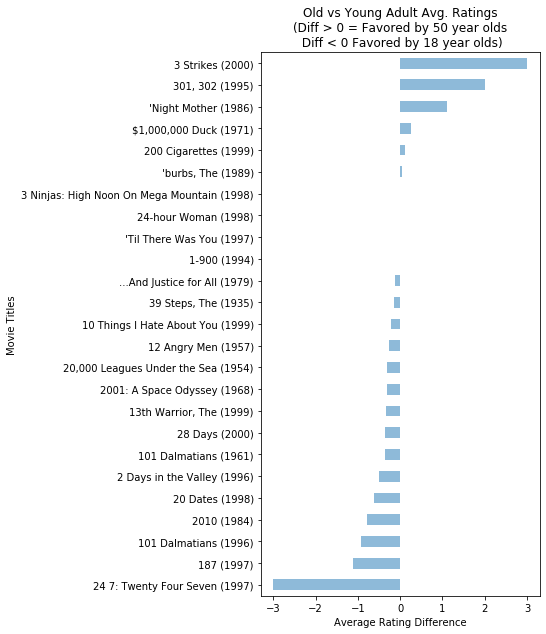

In [170]:
ratings_by_age['diff'] = ratings_by_age[18] - ratings_by_age[50]
diffs = ratings_by_age['diff'][:25] #limit this to 25 movie titles for easy viewing
diffs.sort_values().plot(kind='barh', figsize=[5, 10], alpha = 0.5)
plt.title('Old vs Young Adult Avg. Ratings\n(Diff > 0 = Favored by 50 year olds\n Diff < 0 Favored by 18 year olds)')
plt.ylabel('Movie Titles')
plt.xlabel('Average Rating Difference');

Analysis: Here we can see an interesting comparison between which movies a young adult vs. 
    somebody much older than them may like. If the difference value is greater than
    0, then a 50 year old is more likely to enjoy it than an 18 year old. If you want
    to make both groups happy with a movie choice, select a movie title that has a 
    difference close to 0.
    